In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

from phonetics import utils as u
from phonetics import plots as plots

In [4]:
lab_file = '/Users/tomasandrade/Documents/BSC/ICHOIR/datasets/maria_voice/LABELED_FULL/ES_volver_a_los_17.lab'

In [28]:
df_algn = u.df_alignments_from_lab_file(lab_file, add_transitions=False)
df_algn_tr = u.df_alignments_from_lab_file(lab_file, 
                                           add_transitions=True,
                                           pad_seconds=0.0101)

In [29]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/study_phonemes_contentvec/data/songs'
feat_paths = glob.glob(f'{root}/feat/*.csv')
lab_paths = glob.glob(f'{root}/lab/*.lab')

In [31]:
df_algn[df_algn['duration'] < 0.02].shape

(23, 6)

In [33]:
df_algn_tr[df_algn_tr['duration'] < 0.02]

,start,end,phone_base,duration,start_idx,end_idx
8,0.829148,0.846142,B,0.016994,41,42
24,1.452277,1.471986,y,0.019709,72,73
52,3.310110,3.328675,w,0.018566,165,166
70,3.986648,3.987995,r,0.001347,199,199
88,5.347282,5.365406,e,0.018124,267,268
...,...,...,...,...,...,...
3138,216.629569,216.633868,e,0.004299,10831,10831
3174,219.341633,219.356812,o,0.015179,10967,10967
3184,219.640948,219.644351,e,0.003403,10982,10982
3194,221.492212,221.497382,t,0.005170,11074,11074


In [44]:
feat_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments/maria_v0/feat_768d/feat_768d_layer_12.csv'
df_anotated_12 = pd.read_csv(feat_path, index_col=0)
df_song = df_anotated_12[df_anotated_12['song'] == 'ES_volver_a_los_17']
df_song = df_song.drop(columns=['phone_base', 'song'])

In [53]:
df_annotated = u.add_phone_to_feat_df(df_song, df_algn)
df_annotated_trans = u.add_phone_to_feat_df(df_song, df_algn_tr)

In [73]:
mask1 = df_annotated_trans['duration'] > 0.02
mask2 = df_annotated_trans['phone_base'] != 'transition'

In [74]:
df_clean = df_annotated_trans[mask1 & mask2]

In [76]:
len(df_clean)/len(df_annotated_trans)

0.8505839350985112

In [108]:
feat_path = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments/maria_v2/feat_2d/feat_2d_layer_12.csv'
df_proj_anotated = pd.read_csv(feat_path, index_col=0)

mask = df_proj_anotated['phone_base'] != 'transition'

df_proj_anotated = df_proj_anotated[mask]

In [109]:
unique_phones = list(df_proj_anotated[~df_proj_anotated['phone_base'].isin(['SP'])]['phone_base'].value_counts().keys())

Making a 2d plot


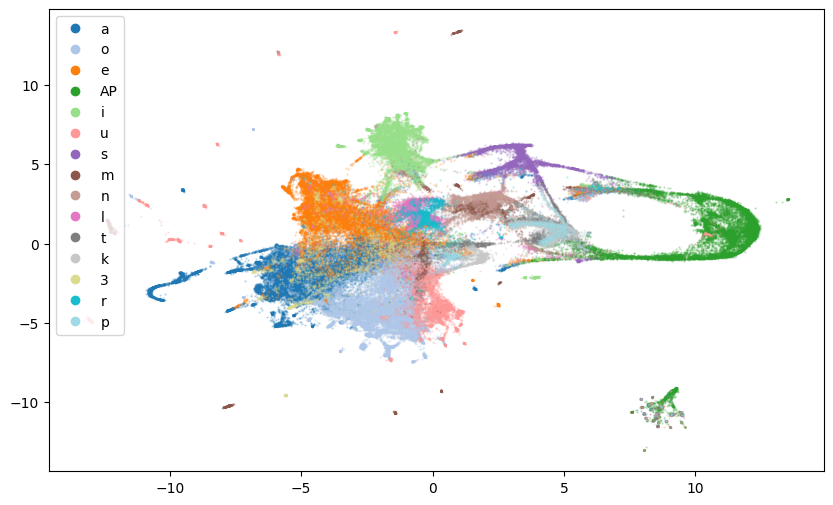

In [110]:
plots.make_tagged_LS_plot(df_proj_anotated,
                phones = unique_phones[0:15],
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [83]:
df_grouped, ph_group = u.group_vowels_consonants_ap(df_proj_anotated)

vowels: ['a', 'e', 'i', 'o', 'u', '3', 'w', '0', 'y']
aspirations: ['AP']
Short pause: SP


Making a 2d plot


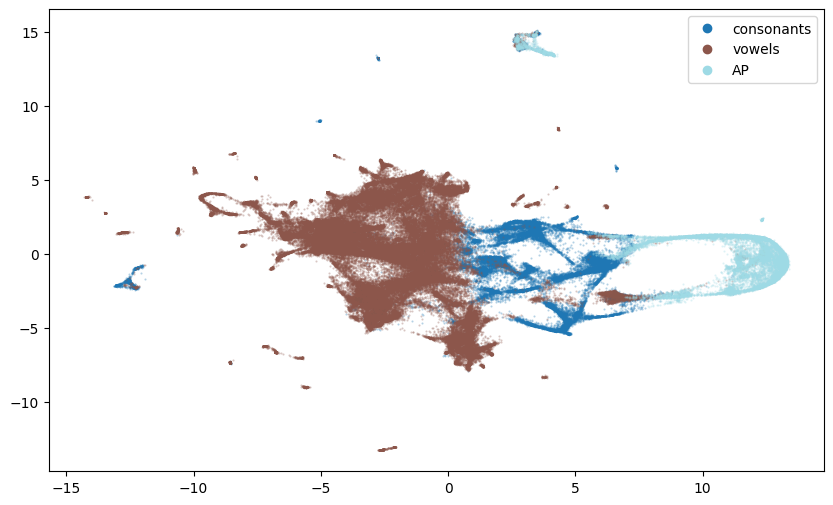

In [84]:
plots.make_tagged_LS_plot(df_grouped,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [75]:
from sklearn.metrics import silhouette_samples

In [132]:
df_filter = df_grouped[df_grouped['phone_base'] != 'i']

In [133]:
X = df_filter[['x', 'y']].values
y = df_filter['group'].values

sample_silhouette_values = silhouette_samples(X, y)

0.3446754906741397


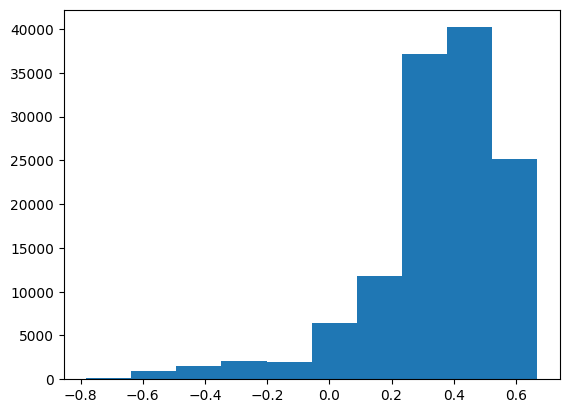

In [135]:
plt.hist(sample_silhouette_values)
print(sample_silhouette_values.mean())

In [92]:
df_grouped['sil_sample'] = sample_silhouette_values

In [127]:
df_grouped.shape

(138269, 7)

In [128]:
df_bad_sil = df_grouped[df_grouped['sil_sample'] < 0]

Making a 2d plot


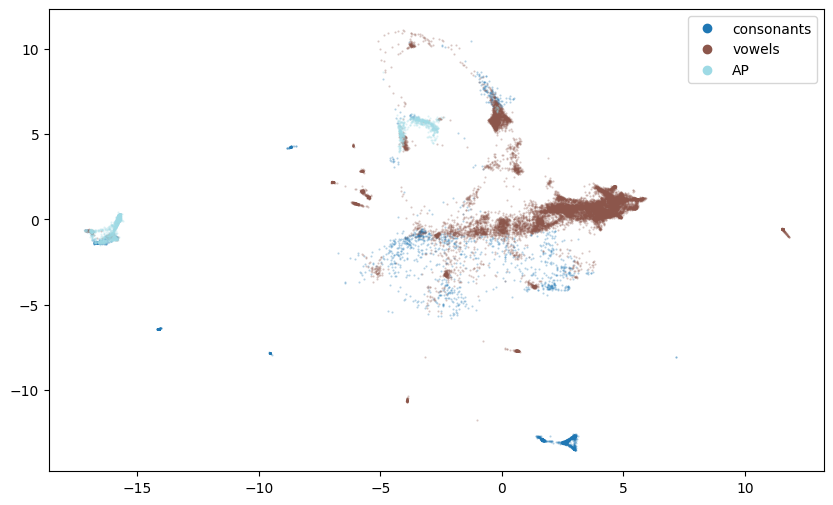

In [130]:
plots.make_tagged_LS_plot(df_bad_sil,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

,x,y,phone_base,duration,song,group,sil_sample
133,0.938312,-2.977781,h,0.114040,ES_volver_a_los_17,consonant,-0.038332
181,0.058982,7.228761,B,0.057805,ES_volver_a_los_17,consonant,-0.326232
288,1.461026,5.730641,m,0.084108,ES_volver_a_los_17,consonant,-0.058614
415,0.591669,6.222428,B,0.018802,ES_volver_a_los_17,consonant,-0.188325
541,-1.963000,5.361062,l,0.075946,ES_volver_a_los_17,consonant,-0.139057
...,...,...,...,...,...,...,...
157764,13.469989,9.621404,AP,0.739890,ES_jota,AP,-0.049408
158164,13.555988,9.080782,AP,0.579352,ES_jota,AP,-0.032948
158171,13.598371,8.703938,AP,0.579352,ES_jota,AP,-0.026248
158174,13.503591,9.690001,AP,0.579352,ES_jota,AP,-0.044530


In [136]:
from sklearn.svm import LinearSVC
import numpy as np

In [140]:
# X: your data, labels: cluster labels (0,1,2)
clf = LinearSVC().fit(X, y)

# decision_function gives per-class scores
scores = clf.decision_function(X)  # shape: (n_samples, n_classes)

# compute margins: difference between best and second-best class score
sorted_scores = np.sort(scores, axis=1)
margins = sorted_scores[:, -1] - sorted_scores[:, -2]

/Users/tomasandrade/miniconda3/envs/ling_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/tomasandrade/miniconda3/envs/ling_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(array([20863., 15106., 22783., 27970., 21843.,  9807.,  4802.,  2174.,
         1648.,   428.]),
 array([1.22582137e-05, 4.01703312e-01, 8.03394366e-01, 1.20508542e+00,
        1.60677647e+00, 2.00846753e+00, 2.41015858e+00, 2.81184963e+00,
        3.21354069e+00, 3.61523174e+00, 4.01692280e+00]),
 <BarContainer object of 10 artists>)

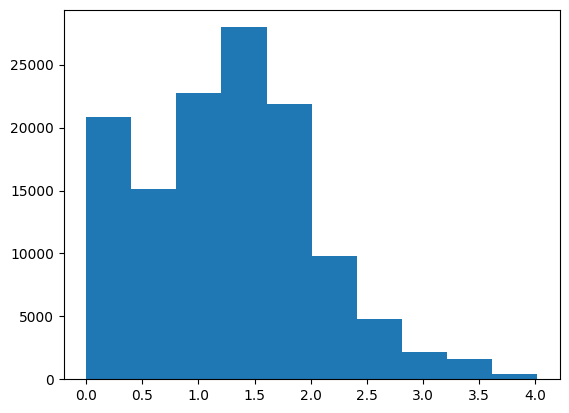

In [154]:
plt.hist(margins)

In [155]:
margins.mean()

1.2722440061928604

In [142]:
from sklearn.svm import SVC
import numpy as np

clf = SVC(kernel="linear", decision_function_shape="ovr")
clf.fit(X, y)

SVC(kernel='linear')

In [150]:
df_filter['group'].unique()

array(['consonant', 'vowel', 'AP'], dtype=object)

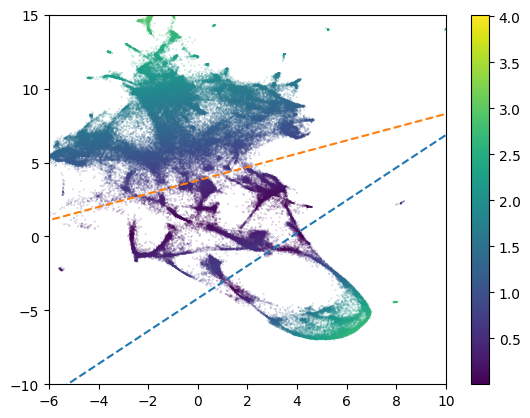

In [159]:
# Scatter plot of your points
plt.scatter(X[:, 0], X[:, 1], s = 0.01, c=margins) #, cmap="Set1", edgecolors="k")

# Define x range
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 200)

# Plot each separating hyperplane
for coef, intercept in zip(clf.coef_[1:], clf.intercept_[1:]):
    # w0*x + w1*y + b = 0  → y = -(w0/w1)*x - b/w1
    slope = -coef[0] / coef[1]
    intercept_line = -intercept / coef[1]
    y_vals = slope * x_vals + intercept_line
    plt.plot(x_vals, y_vals, "--")
    
plt.xlim([-6,10])
plt.ylim([-10,15])
plt.colorbar()
plt.show()